<a href="https://colab.research.google.com/github/br4bit/Neural-Network-Training/blob/master/Guide_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning (Apprendimento Rinforzato)

Il *Reinforcement Learning (RL)* è uno dei campi più eccitanti del Machine Learning oggi, e anche uno dei più vecchi, esiste dagli anni '50.

## Imparare ad ottimizzare i rewards.

Nel Reinforcement Learning, un software *agent* effettua delle *osservazioni* e intraprende delle *azioni* all'interno di un *ambiente (environment)*  e in cambio riceve dei *rewards*.

Il suo obiettivo è imparare ad agire in modo da massimizzare i suoi *rewards* a lungo termine. E' possibile pensare a *rewards* positivi come un piacere, e *rewards* negativi come un dolore/pena. In breve, l'agente agisce nell'ambiente e impara per tentativi ed errori a massimizzare il suo piacere e a minimizzare la sua pena.

Vediamo alcuni esempi di applicazione:

1 (a). L'agente può essere un programma che controlla il movimento di un robot. In questo caso, l'ambiente è il mondo reale, l'agente osserva l'ambiente attraverso un set di sensori, come camera e sensori touch, e agisce inviando segnali ai motori per attivarli. Può essere programmato per ricevere rewards positivi ogni volta che si avvicina alla destinazione, e reward negativi qualora perdesse tempo, andando nella direzione sbagliata o cade.

2 (b). L'agente può essere un programma che controlla Ms. Pac-Man. In questo caso, l'ambiente è la simulazione del gioco Atari. le azioni da intraprendere sono le 9 possibili posizioni del joystick (sopra,sotto,e così via), le osservazioni da cui osservare per intraprendere le azioni saranno gli screenshots, mentre i rewards i game point.

3 (c). L'agente può essere un semplice programma che gioca ad un gioco da tavolo come *Go*.

4 (d). Non necessariamente l'agente deve controllare dei movimenti virtuali o reali di un qualcosa. Ad esempio, può essere un semplice termostato, che riceve dei rewards ogni volta che è vicino alla suo obiettivo di temperatura e risparmia energia e rewards negativi ogni volta che una mano esterna gli modifichi la temperatura, in questo modo l'agente impara ad anticipare i bisogni umani.

5 (e). L'agente può osservare il prezzo di una merce in magazzino per decidere quando comprare e vendere ogni secondo. I rewards saranno ovviamente i guadagni e le perdite monetarie.

![alt text](https://i.gyazo.com/thumb/1000/8e9980121e73e72575469bc49abaff56-png.jpg)


Da notare che non sempre possono esserci rewards positivi; per sempio, l'agente può muoversi in un labirinto, ricevendo rewards negativi ad ogni istante di tempo, dove è meglio trovare un'uscita il più velocemente possibile. Ci sono un mucchio di task dove il RL è stato applicato come nel self-driving cars, per gli ads di una web page, o per controllare dove l'attenzione è focalizzata in un sistema di classificazione d'immagini.

## Policy Search (Determinazone delle azioni da intraprendere)

Il *Policy Search* può essere visto come una linea di condotta o un metodo per determinare le azioni che l'agente deve intraprendere. In breve, è un algoritmo usato dal software agent per determinare le sue azioni, è chiamato la sua *policy*. Per esempio, la policy potrebbe essere una rete neurale che riceve in input le osservazioni e da come output le azioni da compiere:

![alt text](https://i.gyazo.com/d2553cf9477314cc2d9db6282b49562c.png)


La policy può essere qualsiasi algoritmo a cui si possa pensare, e non deve essere nemmeno deterministico. Ad esempio, consideriamo un'aspirapolvere robotica, la cui ricompensa è la quantità di polvere che raccoglie in 30 minuti. La sua policy potrebbe essere quella di muoversi in avanti con una probabilità *p* ogni secondo, oppure ruotare in modo casuale a destra o a sinistra con una probabilità di *1-p*. L'angolo di rotazione sarà un angolo casuale compreso tra *-r e r*. Dal momento che questa policy introduce un pò di casualità è chiamata *stochastic policy*.
Il robot avrà una traiettoria errata, che garantisce che alla fine raggiungerà qualsiasi posto possa raggiungere e raccoglierà tutta la polvere. La domanda è: Quanta polvere riuscirà a raccogliere in 30 minuti?

Come si può addestrare questo robot? Ci sono solo due *policy parametri* che si possono modificare: la probabilità *p* e l'angolo *r*. Un possibile algoritmo di apprendimento potrebbe essere quello di provare molti valori diversi per questi parametri, e scegliere la combinazione che performa al meglio. Questo è un esempio di *policy search*, in questo caso utilizzando un approccio a forza bruta. Tuttavia quando lo *spazio di policy* è molto ampio, trovare un buon set di parametri in questo modo è come cercare un ago in un pagliaio.

Un'altra strada per esplorare lo *spazio di policy (policy space)*  è di usare un *genetic algorithms (algoritmi genetici)*. Per esempio, si potrebbe creare casualmente una prima generazione di 100 policies (criteri) e provarli, uccidere le 80 peggiori policies, e lasciare le restanti 20 come sopravvisuti che producono 4 figli ciascuno. Un figlio non è altro che una copia del suo genitore più una variazione casuale. Le policies sopravvisuti più la loro prole (figli) insieme costituiranno la seconda generazione. Il processo si itera attraverso tutte le generazioni in questo modo, finchè non si trova la policy perfetta.

![alt text](https://i.gyazo.com/ff957f4cf89c999079ebacbcb494c83c.png)


Un altro approccio può essere quello di una tecnica di ottimizzazione, che valuta i gradienti di ogni reward rispetto ai parametri della policy, quindi aggiustando questi parametri seguendo il gradiente verso i rewards più alti *gradient ascent*. Questo approccio è chiamato *policy gradients (PG)*.
Per esempio, torniamo indietro all'aspirapolvere, si potrebbe aumentare leggermente *p* e valutare se questo aumenta la quantità di polvere raccolta dal robot in 30 minuti; se lo fa, allora incrementa *p* un pò di più, o altrimenti riduci *p*. 

Prima di implementare l'algoritmo di PG usando TensorFlow, c'è bisogno di creare un ambiente per l'agente dove possa vivere. Introduciamo OpenAI gym.

## Introduzione OpenAI gym

Una delle sfide dell'apprendimento rinforzato è che per addestare un agente c'è bisogno di un ambiente di lavoro. Se si vuole programmare un agente che impara a giocare ad un gioco Atari, c'è bisogno di un simulatore di gioco Atari. Se si vuole programmare un robot che cammini, allora l'ambiente è il mondo reale dove si può addestrare direttamente il robot in quel ambiente, ma con delle limitazioni: se il robot cade da una scogliera, non basta solo "annullare" l'azione. Non è possibile accelerare il tempo; aggiungere più potenza computazionale non farà si che il robot si muova più velocemente. E in genere è molto costoso addestrare 1000 robot in parallelo.

In breve, l'addestramento nel mondo reale è lento e difficile, quindi c'è bisogno di un simulatore di ambienti, almeno per la prima fase dell'addestramento (bootstrap training).

*OpenAI gym* è un kit di strumenti che forniscono una varietà di simulatori di ambienti (Atari, tavola degli scacchi, mondo 2D, 3D, ecc), così si possono addestrare agenti, compararli tra di loro e implementare nuovi algoritmi di RL.

Installazione di *OpenAI gym*:

In [0]:
!pip3 install --upgrade gym

    100% |████████████████████████████████| 1.5MB 15.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/b9/fd/e1f54a4b99eca10de0d37cc7ecc2ac29a2e51b4eff7e1e5ca7
Successfully built gym
  Found existing installation: gym 0.10.11
    Uninstalling gym-0.10.11:
      Successfully uninstalled gym-0.10.11


Creazione del primo ambiente:

In google colab per utilizzare la funzione env.render() c'è bisogno di un piccolo passaggio:

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
from IPython.display import HTML

In [0]:
#eg screen resolution 1400x900

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


In [0]:

env = gym.make("CartPole-v0") #creazione ambiente

obs = env.reset() #osservazioni

obs

array([0.02362206, 0.00019816, 0.01505991, 0.04627168])

La funzione *make()* crea l'ambiente, in questo caso il carrello con asta. E' una simulazione 2D dove il carrello può accelerare nella direazione di destra e sinistra, per bilanciare l'asta posta al di sopra di esso:

![alt text](https://i.gyazo.com/0a9d7b15a9877b4ab5351ac643414084.png)

Dopo che l'ambiente è stato creato, bisogna inizializzarlo usando il metodo *reset()*. Il metodo ritorna la prima osservazione. Le osservazioni dipendono dal tipo di ambiente. Per il carrello con asta, ogni osservazione è un NumPy array di 1D, contenente 4 valori di tipo float: questi valori rappresentano, la posizione del carrello in orizzontale (0.0 = centro), la sua velocità, l'angolo dell'asta (0.0 = verticale) e la sua velocità angolare.

Chiediamo ora all'ambiente quali sono le possibili azioni con il metodo *action_space*:

In [0]:
env.action_space

Discrete(2)

*Discrete(2)* significa che le possibili azioni sono interi 0 e 1, che rappresentano l'accelerazione vero destra (1) e verso sinistra (0). Altri ambienti avranno più azioni o un altro tipo di azioni (nel continuo).
Dato che l'asta è inclinata verso destra, acceleriamo il carrello verso destra:

In [0]:
action = 1 #accelerazione verso destra

obs, reward, done, info = env.step(action)

print(obs,reward,done,info)

[ 0.02362602  0.19510096  0.01598534 -0.24162192] 1.0 False {}


Il metodo *step()* esegue l'azione sull'ambiente e ritorna 4 valori:

**obs** 

>Questa è la nuova osservazione. Il carrello ora si muove verso destra **(obs[1]>0)**. L'asta è inclinata verso sinistra **(obs[2]<0)**, e la sua velocità angolare è negativa **(obs[3]<0)**, sarà probabilmente inclinata verso sinista al prossimo step. 

**reward**

>In questo ambiente, si avrà sempre un reward di 1.0 ad ogni step, non importa cosa fai, l'obiettivo è quello di continuare a muovere il carrello il più a lungo possibile.

**done**

>Questo valore sarà *True* quando *episodio* è finito. Questo accadrà quando l'asta si inclinerà troppo. Dopodichè l'ambiente dovrà essere ripristinato prima di poterlo riutilizzare dinuovo.

**info**

>Questo dizionario può fornire ulteriori informazioni di debug in altri ambienti. Questi dati non dovrebbero essere usati per l'addestramento (usarli equivale a barare).


Proviamo a scrivere un pezzo di codice per una semplice policy che accelera il carrello verso destra quando l'asta è inclinata verso destra e accelera verso sinistra quando l'asta è inclinata a sinistra. Eseguiremo questa policy su 500 episodi per vedere i rewards medi che ottiene:





500 [54.0, 25.0, 52.0]


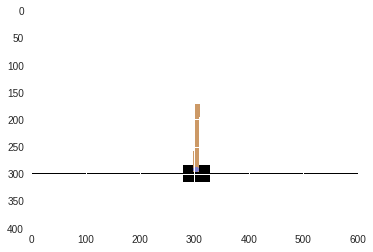

In [0]:
def azione_base(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(env.render(mode='rgb_array')) # Immagine ambiente

for episode in range(500):
  episode_rewards = 0 #Ad ogni inizio dell' episodio il reward è inizilizzato a 0
                      #questo perchè ad ogni uscita dal ciclo degli step, 
                      #l'asta si è inclinata troppo (done=true) o sono terminati gli step
  obs = env.reset()
  for step in range(1000): # Un massimo di 1000 step
    action = azione_base(obs)
    obs,reward,done,info = env.step(action)
    episode_rewards += reward #contatore dei rewards
    #Immagini del carrello con asta ad ogni step
      #img.set_data(env.render(mode='rgb_array')) # just update the data
      #display.display(plt.gcf())
      #display.clear_output(wait=True)

    if done:
      break
  totals.append(episode_rewards) #contiene il numero di rewards di ogni episode.
  
print(len(totals),totals[:3]) #numero di elementi e i primi 3 elementi della lista

Andiamo ora a vedere la media dei rewards positivi e altre informazioni:

In [0]:
import numpy as np

np.mean(totals), np.std(totals), np.min(totals), np.max(totals)


(42.654, 8.841396043612118, 24.0, 71.0)

Anche con 500 prove, questa policy non riesce a mantenere l'asta in verticale per più di 68 step consecutivi. Non molto bene. Dal render dell'ambiente è possibile vedere che il carro oscilla a destra e a sinistra finchè l'asta non si inclina del tutto.

Il codice sopra è una classica implementazione del ciclo "agente-ambiente".Ad ogni step, l'agente sceglie un *action*, e l'ambiente ritorna un *observation* e un *reward*:

![alt text](https://i.gyazo.com/390e7cd7e081ab42bab0650c1129069c.png)


Vediamo se una rete neurale può elaborare una policy migliore.

## Neural Network Policies

Creiamo una policy con rete neurale. Come la policy programmata sopra, anche questa rete neurale avrà come input un'osservazione e darà come output un' azione da eseguire. Più precisamente si stimerà la probabilità di ogni azione, e quindi selezioneremo un'azione in modo casuale in base alle probabilità stimate. Nell'ambiente del carrello con asta, ci sono solo due possibili azioni (destra o sinistra), c'è bisogno di un solo neurone di output. L'output sarà la probabilità *p* dell'azione 0 (sinistra), e la probabilità dell'azione 1 (destra) sarà *1-p*. Ad esempio, se l'output della rete sarà 0.7, allora si utilizzerà l'azione 0 con il 70% della probabilità, e l'azione 1 con il 30% di probabilità. 

![alt text](https://i.gyazo.com/2e55e2774da74940c4861290438e351b.png)

Perchè prendere delle azioni casuali basate sulla probabilità ? Non risulta più pratico prendere l'azione che ha ottenuto lo score più alto dall'output ? Beh no!!!
Questo approccio fa si che l'agente trovi il giusto bilanciamento tra l'esplorazione di nuove azioni e lo sfruttamento delle azioni che sono note per funzionare bene.

Ecco un'analogia per chiarire il concetto: Supponiamo di essere in un ristorante per la prima volta, tutti i piatti sembrano appetitosi, quindi ne scegliamo uno a caso. Se il piatto è buono, allora aumenta la probabilità di riordinarlo la prossima volta, ma non dovresti aumentare questa probabilità del 100% o meglio scegliere sempre lo stesso piatto o altrimenti si preclude la possibilità di provarne altri, alcuni dei quali potrebbero essere anche migliori di quello provato.

Da notare anche che questo tipo di ambiente le azioni passate e le osservazioni possono essere ignorate, poichè ogni azione contiene lo stato completo dell'ambiente. Se ci fosse qualche stato nascosto, allora potrebbe essere necessario considerare anche le azioni e le osservazioni pssate. Ad esempio, se l'ambiente rivela solamente la posizione del carrello ma non la sua velocità (tipico esempio di ambiente nel mondo reale), si dovrebbe considerare non solo l'osservazione corrente ma anche quella precedente in modo da stimare la sua velocità attuale.
Un altro esempio è quando le osservazioni sono rumorose; in tal caso, si utilizzano le ultime osservazioni per stimare lo stato corrente più probabile.

Il problema del carrello con asta è più semplice di come dovrebbe essere; le osservazioni sono senza rumore e contengono lo stato completo dell'ambiente.

Utilizziamo TensorFlow per costruire la nostra policy con una rete neurale:


In [0]:
import tensorflow as tf

# 1. Specifica dell'architettura della rete neurale

n_inputs = 4 # è la dimensione del vettore delle obs env.observation_space.shape[0]
n_hidden = 4 # è un task semplice non c'è bisogno di più neuroni
n_outputs = 1 # ci serve solo la probabilità che il carrello acceleri a sinistra
initializer = tf.contrib.layers.variance_scaling_initializer()

# 2. Costruzione della rete neurale

X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)

# 3. Selezione di un'azione casuale basata su quelle stimate (multinomial sampling)

prob_left_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(prob_left_right), num_samples=1)

init=tf.global_variables_initializer()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.random.categorical instead.


Analizziamo il codice:

1. Dopo import, definiamo l'architettura della nostra rete. Il numero di input è pari alla grandezza dello spazio delle osservazioni (4), utilizziamo 4 hidden neuroni e si ha solo 1 neurone di output che ci da la probabilità di andare a sinistra.

2. Costruzione della rete neurale. In questo esempio abbiamo una rete con un singolo output e un solo layer hidden. L'output layer usa la funzione di attivazione sigmoid in modo da dare come output una probabilità compresa tra 0.0 e 1.0. Se ci fossero state più di due azioni possibili nell'ambiente da parte dell'agente, allora ci sarebbe stato un neurone di output per ogni azione, e ovviamente sarebbe stato necessario l'uso della funzione softmax.

3. Infine, utilizziamo la funzione *multinomial()* per prelevare un'azione casuale. **Questa funzione campiona in modo del tutto indipendente uno o più numeri interi, data la probabilità di logaritmo di ogni intero**. Ad esempio, se chiamiamo la funzione su un array **[ np.log(0.5), np.log(0.2), np.log(0.3) ]** e **num_samples=5** , si hanno in output **5 interi**, ognuno dei quali avrà una probabilità del **50% di essere 0**, il **20% di essere 1** e il **30% di essere 2**. Nel nostro caso c'è bisogno di un solo intero che rappresenti l'azione da prendere* (c'è solo 1 intero che avrà una probabilità di (prob_left_right) di essere 0 (accelerazione sinistra))*.
Poichè il tensore *outputs* contiene solo la probabilità di andare a sinistra, dobbiamo prima concatenare *1-outputs* per avere un tensore che contiene le probabilità di entrambe le azioni, sinistra e destra. **Nota che se ci fossero più di due azioni possibili, la rete neurale avrebbe dovuto produrre una probabilità per(ogni) azione, quindi non avresti avuto bisogno della fase di concatenazione.**

Ora abbiamo la nostra policy con rete neurale (NN policy) che prenderà osservazioni e darà come output le azioni. Ma come l'addestriamo?

## Valutazione delle azioni: Il problema dell'assegnazione del reward (The Credit Assignment Problem)

 Se sapessimo quale fosse l'azione migliore in ogni fase (step), potremmo addestrare la rete neurale come al solito, minimizzando la cross entropy tra la probabilità stimata (y^) e la probabilità di destinazione (y). Come fosse un apprendimento supervisionato, dove si ha la probabilità target y e quella stimata y^ dalla rete neurale. Tuttavia nell'Apprendimento Rinforzato, l'unica guida che l'agente ha è quella attraverso i rewards e i rewards in genere sono scarsi e arrivano in ritardo. Ad esempio, se l'agente riesce a bilanciare l'asta per 100 step, come può sapere quale di queste 100 azioni è stata buona e quali di queste erano cattive? Tutto quello che sa è che l'asta è caduta dopo l'ultima azione, ma sicuramente quest'ultima azione non è interamente responsabile, ci sarà stato un insieme di azioni che ha eseguito che ha portato alla caduta dell'asta. Questo problema è chiamato *Credit assignment problem*: dove l'agente riceve dei rewards(o ricompensa), ma è difficile per lui determinare quali azioni dovrebbero essere accreditate (o incolpate) per essa (per il reward). In breve, l'agente ha bisogno di sapere quale sequenza di azioni ha portato il carrello a far mantenere l'asta in verticale e quali no, ha bisogno di sapere quali azioni devono essere accreditate per buone e quali no. Si pensi ad un cane che riceve la sua ricompensa dopo ore che si è comportato bene; come può capire per che cosa è stato ricompensato ?
Esempio pratico: finchè il carrello non cade esegui l'azione, sta ricevendo sempre rewards positivi, ma ad un tratto, l'asta cade, e  arriva il rewards negativo, come fa l'agente a sapere ora quale sequenza di azioni ha causato la caduta dell'asta? sa solo che nell'ultima azione ha ricevuto un rewards negativo, l'asta è caduta. Potrebbe pensare che tra le 100 azioni che ha eseguito solo l'ultima ha causato la caduta del carello, quindi conviene scartarla, ma anche in questo modo non funzionerebbe, le azioni che esegue sono solo quelle di accelerare verso destra o sinistra, non ha una visione generale sul numero di azioni che deve eseguire per mantenere l'asta in verticale e quindi accreditare queste azioni.

C'è bisogno di una strategia che valuti un'azione basandosi sulla somma di tutti i rewards che ne conseguono da essa, applicando un fattore di *discount  γ (gamma)* ad ogni step. Ad esempio (guardare la figura):

![alt text](https://i.gyazo.com/c0e247df550c2d9f5e4a4014448fb868.png)

Se l'agente decide di andare a destra 3 volte di seguito e riceve come ricompensa +10 dopo il primo step, 0 dopo il secondo e infine -50 dopo il terzo passo, quindi assumendo che si usa un fattore di sconto γ = 0.8, la prima azione avrà un puntaggio totale di 10 + γ x 0 + γ^2 x (-50) = -22. Se il fattore gamma è vicino 0, i rewards futuri non contano molto rispetto ai rewards immediati. Viceversa, se il fattore di sconto è vicino a 1, i rewards futuri (lontani) contano quasi quanto i rewards immediati. Tipicamente il fattore gamma è 0.95 o 0.99. Con gamma pari a 0.95, i rewards di 13 step nel futuro contano all'incirca come la metà dei rewards immediati (0.95^13 ≈ 0.5), mentre con un fattore di 0.99, i rewards di 69 step nel futuro contano come la metà dei rewards immediati.Nell'ambiente del carrrello con asta, le azioni hanno effetti a breve termine, quindi la scelta di un fattore gamma di 0.95 sembra ragionevole. Naturalmente, una buona azione può essere seguita da diverse azioni sbagliate che fanno cadere rapidamente l'asta, con il risultato che la buona azione ottiene un punteggio basso (come quando un buon attore recita in un film terribile).
Tuttavia, se effettuiamo abbastanza prove, in media le buone azioni otterranno un punteggio migliore di quelle cattive. Quindi, per ottenere punteggi di azioni affidabili, dobbiamo eseguire molti episodi e normalizzare tutti i punteggi delle azioni (sottraendo la media e dividendo per la deviazione standard, in modo da avere una distribuzione dei punteggi normale). Dopodichè, possiamo presumere che le azioni con punteggi negativi fossero negative, mentre le azioni con un punteggio buono erano buone.

Perfetto, ora abbiamo un modo per valutare ogni azione, il passo successivo consiste nel formare un'agente usando i gradienti del policy (*Policy Gradients*).

## Policy Gradients

Gli algoritmi PG ottimizzano i parametri di una policy seguendo i gradienti verso i rewards più alti. Una classe popolare di algoritmi PG, chiamati *REINFORCE algorithms* è stata introdotta nel 1992 da Ronald Williams. Ecco una variante di questi algoritmi:

1. Primo, lasciare che la policy della rete neurale giochi più volte e ad ogni step calcoli i gradienti che renderebbero ancora più probabile l'azione scelta, ma non utilizzare ancora questi gradienti.

2. Dopo aver eseguito diversi episodi, si calcola il punteggio di ciascuna azione (utilizzando il metodo descritto nella sezione precedente).

3. Se il punteggio di un'azione è positivo, significa che l'azione è stata buona e si applicano i gradienti calcolati prima per quella azione per renderla una scelta più probabile nel futuro. Tuttavia, se il punteggio è negativo, significa che l'azione è stata negativa e si applicano i gradienti opposti per rendere la scelta di questa azione meno probabile nel futuro. La soluzione è semplicemente moltiplicare ogni vettore gradiente per il punteggio dell'azione corrispondente.

4. Infine, si calcola la media di tutti i vettori di gradiente risultanti, per utilizzarla nel calcolo dello step per il Gradient Descent.

Implementiamo questo algoritmo in TensorFlow. Addestreremo una rete neurale policy costruita in precedenza in modo che impari a bilanciare l'asta sul carrello. Iniziamo a completare la fase di costruzione iniziata in precedenza, aggiungiamo la probabilità di target, la funzione di costo e il training operation. 

Poichè agiamo come se l'azione scelta fosse l'azione migliore possibile, a probabilità di destinazione deve essere 1 se l'azione scelta è quella di andare a sinistra (0 ) e 0.0 se l'azione scelta è quella di andare a destra (1). Effettuiamo questa definizione perchè non abbiamo labels come nel caso del supervised learning, quindi c'è bisogno del target label per addestrare la rete.

In [0]:
y = 1. - tf.to_float(action)

Instructions for updating:
Use tf.cast instead.


Ora che abbiamo la probabilità di target, definiamo la cost function (cross entropy) e calcolare i gradienti:

In [0]:
learning_rate = 0.01

cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits)

optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)

Nota che è stato chiamato il metodo *compute_gradients()* invece del metodo *minimize()*. Questo perchè vogliamo modificare i gradienti prima di applicarli. Il metodo *compute_gradients()* restituisce una lista di coppie vettore gradiente/variabile (una coppia per variabile trainabile). Mettiamo i gradienti in una lista, in modo da ottenerli più facilmente:

In [0]:
gradients = [grad for grad, variable in grads_and_vars]

Ora arriva la parte difficile. Durante la fase di esecuzione, l'algoritmo eseguirà la policy e ad ogni step valuterà questi tensori di gradiente e memorizzerà i loro valori. Dopo un certo numero di episodi, modificherà i gradienti (moltiplicandoli per i punteggi delle azioni e nornalizzandoli) e calcolando la media dei gradienti modificati. Successivamente sarà necessario riportare i gradienti risultanti all'optimization in modo che si possa eseguire un optimization step. Questo significa che abbiamo bisogno di un placeholder per ogni vettore del gradiente. Inoltre, dobbiamo creare l'operation che applicherà i gradienti aggiornati. Useremo la funzione *apply_gradients()* dell'optimizer, che prende una lista della coppia vettore gradiente/variabile.  Invece, di dargli i vettori del gradiente originale, gli daremo una lista contenente i gradienti aggiornati (cioè quelli del placeholder):

In [0]:
gradient_placeholders = []
grads_and_vars_feed = []

for grad,variable in grads_and_vars:
  gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
  gradient_placeholders.append(gradient_placeholder)
  grads_and_vars_feed.append((gradient_placeholder, variable))
  
  
training_op = optimizer.apply_gradients(grads_and_vars_feed)

Fase di costruzione completa:

In [0]:
import tensorflow as tf
import numpy as np

# 1. Specifica dell'architettura della rete neurale

n_inputs = 4 # è la dimensione del vettore delle obs env.observation_space.shape[0]
n_hidden = 4 # è un task semplice non c'è bisogno di più neuroni
n_outputs = 1 # ci serve solo la probabilità che il carrello acceleri a sinistra
initializer = tf.contrib.layers.variance_scaling_initializer()

# 2. Costruzione della rete neurale

X = tf.placeholder(tf.float32, shape=[None,n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer=initializer)
logits = tf.layers.dense(hidden, n_outputs, kernel_initializer=initializer)
outputs = tf.nn.sigmoid(logits)

# 3. Selezione di un'azione casuale basata su quelle stimate (multinomial sampling)

prob_left_right = tf.concat(axis=1, values=[outputs, 1-outputs])
action = tf.multinomial(tf.log(prob_left_right), num_samples=1)

# 4. Definizione del label target e cost function
y = 1. - tf.to_float(action)
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, 
                                                        logits=logits)
learning_rate = 0.01
# 5. Definizione del PG algorithm
optimizer = tf.train.AdamOptimizer(learning_rate)
grads_and_vars = optimizer.compute_gradients(cross_entropy)
gradients = [grad for grad, variable in grads_and_vars]
gradient_placeholders = []
grads_and_vars_feed = []

for grad,variable in grads_and_vars:
  gradient_placeholder = tf.placeholder(tf.float32, shape=grad.get_shape())
  gradient_placeholders.append(gradient_placeholder)
  grads_and_vars_feed.append((gradient_placeholder, variable))
  
training_op = optimizer.apply_gradients(grads_and_vars_feed)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


Prima della fase di esecuzione, bisogna definire due funzioni, per calcolare la somma dei rewards dati i rewards e normalizzarli durante gli episodi:

![alt text](https://cloud.githubusercontent.com/assets/2981167/23574559/6195a456-0034-11e7-8a71-c25092869edf.png)

![alt text](https://cloud.githubusercontent.com/assets/2981167/23574363/80fb2836-0032-11e7-8a91-dcbf21c3d0e5.png)

In [0]:
import numpy as np


def discount_rewards(rewards, gamma):
  discount_rewards = np.empty(len(rewards))
  rewards_acc = 0
  for step in reversed(range(len(rewards))):
    rewards_acc = rewards[step] + rewards_acc * gamma
    discount_rewards[step] = rewards_acc
  return discount_rewards

def discount_and_normalize_rewards(all_rewards,gamma):
  all_discount_rewards = [discount_rewards(reward,gamma)
                          for reward in all_rewards]
  flat_rewards = np.concatenate(all_discount_rewards)
  rewards_mean = flat_rewards.mean()
  rewards_std = flat_rewards.std()
  return [(discounted_reward - rewards_mean) / rewards_std
         for discounted_reward in all_discount_rewards]
    

print(discount_rewards([10,0,-50], 0.8))
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], gamma=0.8)

[-22. -40. -50.]


[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

La funzione *discount_and_normalize_rewards()* ritorna lo score normalizzato per ogni azione in entrambi gli episodi. Da notare che lo score  del primo episodio è molto peggio del secondo, infatti gli score normalizzati sono tutti negativi; tutte le azioni del primo episodio possono essere considerate sbagliate, al contrario tutte le azioni del secondo episodio possono essere considerate buone.

In [0]:
n_iterations = 250      # number of training iterations
n_max_steps = 1000      # max steps per episode
n_games_per_update = 10 # train the policy every 10 episodes
save_iterations = 10    # save the model every 10 training iterations
gamma = 0.95            # the discount factor


with tf.Session() as sess:
  init.run()
  for iteration in range(n_iterations):
    all_rewards = []    # all sequences of raw rewards for each episode
    all_gradients = []  # gradients saved at each step of each episode
    for game in range(n_games_per_update):
      current_rewards = []   # all raw rewards from the current episode
      current_gradients = [] # all gradients from the current episode
      obs = env.reset()
      for step in range(n_max_steps):
        action_val, gradients_val = sess.run(
                  [action, gradients], feed_dict={X: obs.reshape(1, n_inputs)}) # one obs
        obs, reward, done, info = env.step(action_val[0][0])
        current_rewards.append(reward)
        current_gradients.append(gradients_val)
        if done:
          break
      all_rewards.append(current_rewards)
      all_gradients.append(current_gradients)
      
      
      # At this point we have run the policy for 10 episodes, and we are
      # ready for a policy update using the algorithm described earlier.
      
      all_rewards = discount_and_normalize_rewards(all_rewards, gamma)
      feed_dict = {}
      for var_index, grad_placeholder in enumerate(gradient_placeholders):
        # multiply the gradients by the action scores, and compute the mean
         mean_gradients = np.mean(
             [reward * all_gradients[game_index][step][var_index]
             for game_index, rewards in enumerate(all_rewards):
             for step, reward in enumerate(rewards)],
             axis=0):
            feed_dict[grad_placeholder] = mean_gradients
      sess.run(training_op, feed_dict=feed_dict)
      if iteration % save_iterations == 0:
        saver.save(sess, "./my_policy_net_pg.ckpt")

Ogni iterazione di addestramento inizia eseguendo la policy per 10 episodi (con un massimo di 1000 step per episodi, per evitare che cicli all'infinito).Ad ogni passo calcoliamo anche i gradienti, facendo finta che l'azione scelta sia la migliore. Dopo che questi 10 episodi sono stati eseguiti, calcoliamo i punteggi delle azioni usando la funzione *discount_and_normalize_rewards ()*; passiamo attraverso ogni variabile trainabile, attraverso tutti gli episodi e tutti i step, per moltiplicare ogni vettore gradiente con il suo punteggio di azione corrispondente; e calcoliamo la media dei gradienti risultanti. Infine, eseguiamo l'operazione di allenamento, alimentandola con questi gradienti medi (uno per variabile trainabile). Salviamo anche il modello ogni 10 operazioni di allenamento.

Nota che ci sono due modi in cui l'agente può perdere il gioco: o l'asta può inclinarsi troppo o il carrello può andare completamente fuori dallo schermo. Con 250 iterazioni di allenamento, la policy impara a bilanciare abbastanza bene l'asta, ma non è ancora abbastanza buona per evitare di uscire dallo schermo. Alcune centinaia di iterazioni di allenamento lo risolveranno.


Vedremo ora un'altra popolare famiglia di algoritmi. Mentre gli algoritmi PG cercano direttamente di ottimizzare la policy per aumentare i premi, gli algoritmi che vedremo ora sono meno diretti: l'agente impara a stimare la somma prevista dei discount rewards futuri per ogni stato, o la somma prevista dei discount rewards futuri per ogni azione in ogni stato, e utilizza questa conoscenza per decidere come agire. Per comprendere questi algoritmi, introduciamo *Markov decision processes (MDP)*.

## Markov decision processes

Andrey Markov studiò i processi stocastici senza memoria, e li chiamò catene di Markov (Markov chains). Tale processo ha un numero fisso di stati e si evolve in modo casuale da uno stato all'altro in ogni step. La probabilità di evolvere da uno stato *s* ad uno stato *s'* è fissata, e dipende solo dalla coppa *(s,s')*, non dagli stati passati (il sistema non ha memoria). Esempio di catena di Markov con 4 stati:
![alt text](https://i.gyazo.com/472716a0fccbcb3a63ee331850b63f70.png)

Supponiamo che il processo inizi dallo stato *S0*, con una probabilità del 70% di rimanere in quello stato al prossimo step. Alla fine è destinato a lasciare quello stato e non tornare mai più, poichè nessun altro stato punta a *S0* . Se va allo stato *S1*, allora molto probabilmente andrà nello stato *S2* (90% di probabilità), quindi tornerà immediatamente allo stato *S1* (100% di probabilità). Può alternarsi un numero di volte tra queste due stati, ma alla fine cadrà nello stato *S3* (10% di probabilità), e rimarrà li per sempre (questo è uno *stato terminale*).

I MDP descritti da Richard Bellman, assomigliano alle catene di Markov, ma con una modifica: **ad ogni step un agente può scegliere una delle varie azioni possibili e le probabilità di transizione da uno stato all'altro dipendono dall'azione scelta. Inoltre, alcune transizioni di stato restituiscono dei rewards (positivi o negativi) e l'obiettivo dell'agente è trovare una policy (politica) che massimizzerà questi rewards (premi/ricompense) nel tempo.** 

Esempio di MDP con 3 stati e fino a 3 possibili azioni discrete in ogni step:
![alt text](https://i.gyazo.com/1f95e1626574a7d7f01c084b259cd65f.png)

**Se si inizia dallo stato *s0*, l'agente può scegliere tra le azioni *a0,a1,a2*. Se sceglie l'azione *a1*, rimane con certezza nello stato *s0* senza ricevere alcuna ricompensa, e può decidere quindi di rimanere in quello stato per sempre, se vuole. Ma se sceglie l'azione *a0*, avrà un 70% di probabilità di ricevere una ricompensa di +10 e rimanere nello stato *s0*. Può quindi provare ancora,ancora e ancora per ottenere più ricompense possibili. Ma ad un certo punto finirà nello stato *s1* (30% di probabilità). Nello stato *s1* ci sono solo due possibili azioni: *a0,a2*. Può scegliere di rimanere scegliendo ripetutamente l'azione *a0* o può scegliere di passare allo stato *s2* e ottenere una ricompensa negativa di -50 (ouch!). Nello stato *s2* non ha altra scelta che scegliere *a1*, che molto probabilmente lo condurrà nello stato *s0* (80% di probabilità), guadagnando una ricompensa di +40 sulla strada. Osservando la figura, quale strategia otterrà il numero maggiore di ricompense nel tempo ? 
Nello stato *s0* è chiaro che l'azione *a0* è la migliore opzione, e nello stato *s2* l'agente non ha scelta se non quella di scegliere *a1*, ma nello stato *s1* non è così ovvio cosa l'agente deve scegliere, se rimanere (*a0*) oppure attraversare il fuoco (*a2*).**

*Bellman* ha trovato una strada (un modo) per stimare *valore di stato ottimale (optimal state value)* di qualsiasi stato *s*, rinominato *V*\*(s), che è la somma di tutte le ricompense future scontate (discounted), che l'agente può aspettarsi in media dopo che aver raggiungo uno stato *s*, assumendo che agisca in modo ottimale. Bellman ha dimostrato che se l'agente agisce in modo ottimale allora si applica (è verificata) l'equazione dell'ottimizzazione di Bellman:
![alt text](https://i.gyazo.com/e8d4c01dad6378080190ba23197e21cd.png)

Questa equazione ricorsiva, dice che: **se l'agente agisce in modo ottimale, allora il valore ottimale dello stato corrente è uguale alla ricompensa che otterrà in media dopo aver scelto un'azione ottimale, più il valore ottimale atteso di tutti i possibili stati successivi a cui questa azione può portare. La domanda che l'agente si pone è: qual è lo stato ottimale che devo raggiungere? Quale stato mi garantisce più ricompense ? questa equazione ci dice in pratica, qual è la ricompensa che otterrà l'agente se andrà in uno stato piuttosto che in un altro.**

* *T(s,a,s')* è la probabilità di transizione dallo stato *s* a *s'*, data la scelta dell'azione *a* da parte dell'agente.

* *R(s, a, s′)* è la ricompensa che l'agente ottiene quando passa dallo stato *s* a *s'*, data la scelta dell'azione *a* da parte dell'agente.

* *γ* è il fattore di sconto (discount).

Questa equazione porta direttamente ad un algoritmo che può stimare con precisione il valore di stato ottimale per ogni possibile stato: Inizialmente si inizializzano tutte le stime del valore dello stato a zero e quindi si aggiornano iterativamente utilizzando l'algoritmo *Value Iteration*:
![alt text](https://i.gyazo.com/1ed062fe66b265e82e9e8c79108d0819.png)

* *Vk(s)* è il valore stimato dello stato *s* alla *k*-esima iterazione dell'algoritmo.

Un risultato notevole è che, dato un tempo sufficiente, queste stime alla fine convergeranno ai valori di stato ottimali (stime ottimali), trovando quindi la policy ottimale.

*Nota: Questo algoritmo è un esempio di programmazione dinamica, che suddivide un problema complesso (in questo caso stimando una somma potenzialmente infinita di premi futuri scontati) in sub-problemi trattabili che possono essere affrontati in modo iterativo (in questo caso trovare l'azione che massimizza la ricompensa media più il successivo valore dello stato scontato).*

Conoscere il valore dello stato ottimale può essere utile, in particolare per valutare una policy, ad esempio: una policy porta ad un valore di stato ottimale x mentre un'altra policy porta ad un valore di stato ottimale y, quale policy è migliore ? questo algoritmo però non ci dice esplicitamente cosa l'agente deve fare, o meglio, quale azione scegliere. Bellman è riuscito a trovare un algoritmo per stimare il valore *stato-azione* ottimale, chiamato generalmente *Q-values* (quante ricompense devo aspettarmi scegliendo l'azione *a* che mi porta nello stato *s*). 

**Il valore ottimale Q-Value della coppia stato-azione *(s,a)*, denominato Q*(s,a), è la somma delle ricompense future scontate che l'agente si aspetta in media dopo aver raggiunto lo stato *s* scegliendo l'azione *a, ma prima di vedere il risultato di questa azione, supponendo che agisca in modo ottimale dopo quell'azione.**

Ecco come funziona: si inizializzano i valori di Q ottimali a zero, e ad ogni iterazione utilizzando il *Q-Value algorithm* si aggiornano:

![alt text](https://i.gyazo.com/2e88720aacf1d09027bd01ce37af2264.png)

Una volta ottenuti i valori di Q ottimali, la definizione della policy (politica) che l'agente dovrà seguire, nota come π\*(s), è banale: **quando l'agente è nello stato *s*, dovrebbe scegliere l'azione con il Q-Value più elevato per quello stato:**

![alt text](https://i.gyazo.com/391a1f16284dcd1116923e32c17ba803.png)

Applichiamo ora l'algoritmo al MDP della figura:
![alt text](https://i.gyazo.com/1f95e1626574a7d7f01c084b259cd65f.png)
Per prima cosa definiamo la il MDP:

In [0]:
import numpy as np

nan = np.nan #rappresenta l'azione impossibile, es: s1 non ha l'azione a1

# T[s,a,s'] probabilità di transizione dallo stato s a s', data l'azione a
T = np.array([ #dimensione della matrice [s,a,s'],
               #le righe sono gli stati possibili (s0,s1,s2), le colonne le azioni (a0,a1,a2)
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]], #costruzione dello stato
                                                         #s0 e le 3 azioni con le probabilità di transizione
    [[0.0, 1.0, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]],#costruzione s1, [0.0, 1.0, 0.0] indica la probabilità
    #di transizione dell'azione a0, scegliendo a0 con 1.0 di probabilità rimane nello stato s1, a0 porta
    #l'agente solo nello stato s1 quindi la probabilità di andare negli altri stati s0 e s1 è pari a 0.0
    #è possibile vedere la riga s1 della matrice T in questo modo: a0=[s0,s1,s2],a1=[nan,nan,nan],a2=[s0,s1,s2]
    #dove nelle colonne di ogni elemento della matrice T c'è la probabilità di transizione dell'azione a
    #in uno dei 3 stati possibili (s0,s1,s2).
    [[nan, nan, nan], [0.8, 0.1, 0.1], [nan, nan, nan]],
])

# R[s,a,s'] ricomepensa che si ottiene con a, passando dallo stato s a s'

R = np.array([ #dimensione uguale a T, [s,a,s']
    [[10., 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
    [[0.0, 0.0, 0.0], [nan, nan, nan], [0.0, 0.0, -50]],
    [[nan, nan, nan], [40., 0.0, 0.0], [nan, nan, nan]],
])

possible_actions = [[0, 1, 2], [0, 2], [1]] #lista con dimensioni pari al n_stati
#ogni elemento della lista è lo stato con le possibili azioni, es:
# stato s0 = [a0,a1,a2] = [0,1,2]; lo stato s1 = [a0,a2] = [0,2]; lo stato s2 = [a1] = [1]

Implementiamo l'algoritmo Q-Value Iteration:

per prima cosa c'è bisogno di definire Q che avrà dimensione pari a (n_stati,n_azioni) essendo Q\*(s,a) 

In [0]:
#Implementiamo l'algoritmo Q-Value Iteration

Q = np.full((3,3),-np.inf) #-inf per le azioni impossibili

#inizializziamo tutti i valori di Q a 0.0 per le azioni possibili e lasciamo -inf per quelle impossibili

for state,action in enumerate(possible_actions): #per ogni elemento in possible_actions
                                                 #viene prodotta una tupla (contatore,elemento)
  print(state,action)
  Q[state,action] = 0.0 #esempio: state=0 action = [0,1,2] metterà 0 nelle posizioni 0,1 e 2 della matrice Q
                        #analogamente per lo state=2 action=[1] lo 0 è solo nella colonna 1 della riga 3
print(Q)

gamma = 0.95 #fattore di discount
iterazioni = 100
n_stati = Q.shape[0]

for i in range(iterazioni):
  Q_prev = Q.copy() #c'è bisogno di salvare il valore di Q precedente
  for s in range(n_stati):
    for a in possible_actions[s]:
      Q[s,a] = np.sum([
          T[s, a, sp] * (R[s, a, sp] + gamma * np.max(Q_prev[sp]))
          for sp in range (n_stati)
      ])      
  
print("\nValori di Q ottimali dopo 100 iterazioni: \n\n",np.round(Q,2))
#Ora la policy migliore per quel MDP sarà data da argmax su a di Q*(s,a)
print("\n",np.argmax(Q,axis=1)," Azioni ottimali per ogni stato.")

0 [0, 1, 2]
1 [0, 2]
2 [1]
[[  0.   0.   0.]
 [  0. -inf   0.]
 [-inf   0. -inf]]

Valori di Q ottimali dopo 100 iterazioni: 

 [[21.89 20.79 16.85]
 [ 1.11  -inf  1.17]
 [ -inf 53.86  -inf]]

 [0 2 1]  Azioni ottimali per ogni stato.


Ecco la policy ottimale per questo MDP, quando si usa un discount factor di 0.95: nello stato *s0* sceglie l'azione *a0*, nello stato *s1* sceglia l'azione *a2* (attraverso il fuoco!) e nello stato *s2* scegli l'azione *a1* (l'unica azione possibile). Una cosa molto interessante accade se si abbassa il discount factor a 0.9, la policy ottimale cambia: nello stato *s1* l'azione migliore è *a0* (rimani nello stato, non andare nel fuoco). Questo ha senso perchè abbassando il discount factor si sta valutando il presente molto più del futuro, non si fa altro che valutare le ricompense presenti immediate molto più di quelle future, quindi la prospettiva delle ricompense future non vale la pena immediata che si avrebbe attraversando il fuoco.

In [0]:
import numpy as np

nan = np.nan
T = np.array([  
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], [nan, nan, nan], [0.0, 0.0, 1.0]],
    [[nan, nan, nan], [0.8, 0.1, 0.1], [nan, nan, nan]],
])

R = np.array([
    [[10., 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]],
    [[0.0, 0.0, 0.0], [nan, nan, nan], [0.0, 0.0, -50]],
    [[nan, nan, nan], [40., 0.0, 0.0], [nan, nan, nan]],
])

possible_actions = [[0, 1, 2], [0, 2], [1]]

Q = np.full((3,3),-np.inf)

for state,action in enumerate(possible_actions):
  Q[state,action] = 0.0
  
gamma = 0.9
  
iterazioni = 100
n_stati = Q.shape[0]

for i in range(iterazioni):
  Q_prev = Q.copy()
  for s in range(n_stati):
    for a in possible_actions[s]:
      Q[s,a] = np.sum([
          T[s, a, sp] * (R[s, a ,sp] + gamma * np.max(Q_prev[sp]))
          for sp in range(n_stati)
      ])
      
print(np.argmax(Q,axis=1))

[0 0 1]


## Temporal Difference Learning and Q-Learning

Nell'Apprendimento Rinforzato i problemi con azioni discrete possono essere modellati come processi decisionali di Markov, ma inizialmente l'agente non ha idea di quali siano le probabilità di transizione (non conosce T[s, a , s']), e non sa quali saranno le ricompense (non conosce R[s, a , s']). Deve sperimentare ogni stato e ogni transizione almeno una volta per conoscere le ricompense, e deve sperimetarli più volte se deve avere una stima ragionevole delle probabilità di transizione. 

L'algoritmo di *Temporal Difference Learning (TD)* è molto simile al Value Iteration visto in precedenza, ma ottimizzato per tenere conto del fatto che l'agente ha solo una conoscenza parziale del MDP. In generale si assume che l'agente inizialmente conosca solo i possibili stati e azioni e nulla di più.
L'agente usa una *politica di esplorazione (exploration policy)*, ad esempio, una policy puramente casuale, per esplorare il MDP e mentre procede con l'algoritmo TD aggiorna le stime dei valori di stato in base alle transizioni e alle ricompense osservate:

![alt text](https://i.gyazo.com/6170c9e7c1a6c01f8741996379df07c4.png)

* α è il learning rate (es: 0.001).

*Nota: il TD ha delle similarità con il Stochastic Gradient Descent, in particolare il fatto che gestice un campione alla volta. Proprio come il SGD, può davvero convergere se si riduce il learning rate gradualmente (altrimenti continuerà a rimbalzare intorno all'ottimo).*

Per ogni stato *s* questo algoritmo tiene semplicemente traccia della media corrente delle ricompense immediate (*r*) che l'agente ottiene lasciando quello stato, oltre ai benefici che si aspetta di ottenere in seguito (supponendo sempre che agisca in modo ottimale).

L'algoritmo di Q-Learning in modo analogo è un'adattamento del Q-Value Iteration alla situazione in cui non si conoscano i valori delle probabilità di transizione e le ricompense:

![alt text](https://i.gyazo.com/c67fd41882602362429574d2e64724ff.png)

Per ogni coppia stato-azione *(s,a)*, l'algoritmo tiene traccia della media corrente delle ricompense *r* che l'agente riceve lasciando quello stato *s* con l'azione *a*, oltre alle ricompense che si aspetta in seguito. Poichè, il nostro obiettivo è avere un politica ottimale, prendiamo il massimo delle stime del valore Q per lo stato successivo (*max a' di Q(s',a')*).

Ecco l'implementazione del Q-Learning:


In [0]:
#Lo scopo è quello di esplorare tutti gli stati e le probabilità di transizioni
import numpy as np

learning_rate0 = 0.005
learning_rate_decay = 0.1
n_iterazioni = 2000
gamma = 0.98
s = 0 # start dallo stato 0

possible_actions = [[0, 1, 2], [0, 2], [1]]

Q = np.full((3,3), -np.inf) #-inf per le azioni impossibili

for state,action in enumerate(possible_actions):
  Q[state,action] = 0.0 # Valore iniziale = 0.0, per tutte le azioni possibili
  
for i in range(n_iterazioni):
  a = np.random.choice(possible_actions[s]) # scelta casuale di un'azione
  sp = np.random.choice(range(3), p=T[s,a]) # scelta casuale dello stato successivo
                                            # usando T[s,a]
  ricompense = R[s, a, sp]
  
  learning_rate = learning_rate0 / (1 + i * learning_rate_decay) # decadimento dell'esponenziale
  
  Q[s,a] = ((1 - learning_rate) * Q[s,a] + 
            learning_rate * (ricompense + gamma * np.max(Q[sp])))
  
  s = sp # aggiornamento stato successivo

print(np.argmax(Q,axis=1))

[0 0 1]


Il Q-Learning quindi funziona guardando l'agente giocare (in modo casuale), e gradualmente migliora le stime dei valori di Q. Con un numero sufficiente di iterazioni l'algoritmo convergerà ai valori di Q ottimali. Questa policy è chiamata anche *off-policy* perchè la policy addestrata non è quella che viene eseguita. E' sorprendente che questo algoritmo sia in grado di apprendere la policy ottimale, semplicemente guardando un'agente agire in modo casuale (immaginate di imparare a giocare a tennis o a calcio quando il tuo insegnante è ubriaco). 


Problema, con questo tipo di algoritmo visitare ogni stato e ogni transizione più volte, può richiedere dei tempi molto grandi.

## Exploration Policies

L'algoritmo di Q-Learning può funzionare solo se la politica esplora il MDP molto accuratamente. 

Un'opzione migliore è quella di usare un *ε-greedy policy*: ad ogni step l'agente agisce in modo casuale con una probabilità *ε*, o avidamente (scegliendo l'azione con il valore di Q più alto) con probabilità *1-ε*. Il vantaggio di usare una politica *ε-greedy* (comparata a una politica completamente casuale) è quello di spendere più tempo a esplorare le parti interessanti dell'ambiente, man mano che le stime del valore di Q migliorano. E' molto comune iniziare con un valore di *ε* elevato (1.0) , riducendolo gradualmente (fino a 0.05).


Alternativamente, piuttosto che affidarsi alla possibilità di esplorare, un altro approccio è quello di incoraggiare la policy di esplorazione a provare azioni che non ha mai provato prima. Questo può essere implementato aggiungendo un bonus alla stima del valore di Q:

*Q-Learning usando exploration policy*

![alt text](https://i.gyazo.com/8b3b81887b7e37280cc82282115df2d2.png)

* *N(s', a')* conta il numero di volte che l'azione *a'* è stata scelta nello stato *s'*.

* *f(q, n)* è la *funzione di esplorazione* definita come  *f(q, n) = q + K/(1 + n)*, dove *K* è hyperparametro di curiosità che misura quanto l'agente è attratto dall'ignoto.

## Q-Learning Approssimativo e Deep Q-Learning

Il problema principale con il Q-Learning è che non si adatta bene quando si hanno MDPs di grandi dimensioni con un numero di azioni e stati elevati. Consideriamo il caso in cui vogliamo addestrare un'agente a giocare Ms. Pac-Man. Ci sono circa 250 palline che Ms. Pac-Man può mangiare, ognuna delle quali può essere assente (mangiata) o presente, quindi il numero degli stati sarà pari circ a 2^250 ≈ 10 ^75 (questo considerando solo i possibili stati delle palline) , quindi non c'è assolutamente modo di tenere traccia di una stima di ogni singolo valore di Q.

Poichè abbiamo visto che la funzione Q contiene tutte le informazioni necessarie per creare una politica ottimale, tutto quello di cui c'è bisogno ora è di cercare una rappresentazione approssimata di *Q(s,a)*  la cui dimensione non è polinomiale in |S|. Un approccio possibile è quello di approssimare la *Q(s,a)* , trovando una funzione parametrica ![alt text](https://i.gyazo.com/2fe420ef4c42982df0ce61f42ef9341e.png) , dove il problema del numero di stati elevati è risolto dal fatto che il numero di parametri da memorizzare e aggiornare è molto inferiore al numero di stati.
Ad esempio, nel caso di Ms. Pac-Man si potrebbe pensare di approssimare la funzione Q usando una combinazione ponderata degli stati "mangiato" - "non mangiato" delle palline che sarà pari a 250 x 2 = 500 parametri (cioè, features). Nella precedente formulazione erano richiesti 2^250 stati.

Quindi l'idea è quella di usare una funzione che approssima il Q-Value di ogni coppia *(s,a)* usando un numero di parametri maneggevole (dati dal vettore θ). Da qui il nome *Approximate Q-Learning*.

Questa rappresentazione potrebbe avere una fedeltà inferiore rispetto alla funzione reale in quanto potrebbe non essere in grado di acquisire tutte le combinazioni specifiche degli stati. Vediamo ora la forma parametrica della funzione approssimativa che sarà lineare nei parametri:

![alt text](https://i.gyazo.com/32789811204e983655c99646fda3b819.png)

Con il vettore *φ(s, a)* e *θ* definiti nel seguendo modo: ogni elemento del vettore *φ(s, a)* è chiamato *feature (componente)* ; 

* ![alt text](https://i.gyazo.com/465acbd561dec13f0378f798b2ee2103.png)     indica il valore della feature *i* per la coppia stato-azione *(s,a)*. La funzione delle feature *φ* non fa altro che associare ciascuna coppia stato-azione *(s,a)* a un vettore di valori di feature (caratteristiche).

* ![alt text](https://i.gyazo.com/d59cb544fe2dccf1286b15e49dec845a.png) è il vettore dei pesi che specifica il contributo di ciascuna feature in tutte le coppie stato-azione. θ avrà *m* pesi differenti per ogni azione, per un totale di *m |A| = n * (valori) dove *|A|* indica il numero degli stati.

Ecco un esempio con un MDP con 2 azioni e 3 feature per azione per un totale di 3 x 2 = 6 feature usate per la funzione lineare di approssimazione:

![alt text](https://i.gyazo.com/aba0f625eedf0e5497d33d6efcdffcf0.png)

Da notare la distinzione esplicita tra azioni differenti.

Per anni è stato consigliato l'uso di combinazioni lineari di features estratte dallo stato (come,nel caso di Ms.Pac-Man, la distanza dai fantasmi, la direzione e così via) per stimare i valori di Q, ma usando una rete neurale si può raggiungere un risultato migliore, specie per i problemi complessi, senza richiedere il feature engineering. Una rete DNN usata per stimare i Q-Values è chiamata *deep Q-Network (DQN)* e usare una *DQN* per l'*Approximate Q-learning* è chiamato *Deep Q-Learning*.

Ora come possiamo addestrare una *DQN* ? Una rete neurale ha bisogno di un target. Consideriamo Approximate Q-Value calcolato dalla DQN data la coppia stato-azione *(s,a)*: Grazie all'equazione di Bellman sappiamo di aver bisogno che il Q-Value approssimato sia quanto più vicino possibile alla ricompensa *r* che stiamo osservando dopo aver eseguito l'azione *a* nello stato *s*, in aggiunto al valore di discount di giocare in modo ottimale da quel momento in poi. Per stimare questo valore di discount futuro (di giocare in modo ottimale dallo stato s' in poi) , possiamo semplicemente eseguire il DQN al prossimo stato *s'* e per tutte le azioni possibili *a'* (per quello stato *s'*). Otteniamo un valore di Q approssimativo futuro per ogni azione possibile. Prendiamo quindi il punteggio più alto (dato che assumeremo di giocare in modo ottimale), applichiamo il discount factor e questo ci da una stima del valore scontato futuro (gamma * max a' di Q_theta(s',a')).

Sommando *r* e il valore di discount futuro stimato visto sopra, abbiamo il valore di Q (Q-Value)  di destinazione (target) *y(s,a)* per la coppia stato-azione *(s,a)*, da usare nella rete neurale. 

![alt text](https://i.gyazo.com/33ef3e8e2e406806e61ccb5d20a0d634.png)

Con questo Q-Value target, possiamo eseguire il training utilizzando qualsiasi algoritmo di discesa del gradiente (Gradient Descent).

**In parole povere, andremo a minimizzare l'errore quadratico tra il valore di Q stimato (Q-Value) e il valore di Q di destinazione (Q-Value target).**

Nel DQN Algoritmo abbiamo due cose importanti da tenere in conto:

* Invece di addestrare il DQN sulla base delle ultime esperienze, l'algoritmo salva l'esperienze in un'ampia *replay memory*, e campiona in modo casuale un batch da dentro la memoria, ad ogni iterazione di training. Questo aiuta a ridurre le correlazioni tra le esperienze nel training batch, aiutando enormemente l'allenamento.

* L'algoritmo usa due DQN invece di una: la prima è chiamata *online DQN* che è quella che gioca e impara ad ogni iterazione. La seconda è chiamata *target DQN* che è usata per calcolare solo il valore del target Q-Value (*y(s,a)*). A intervalli regolari i pesi della *online DQN* sono copiati nella *target DQN*. Senza di essa (*online DQN*) ci sarebbe solo una rete che fissa i propri target e cerca di raggiungerli (un pò come un cane che cerca di mordersi la coda). L'unico ruolo della *target DQN* è stimare i valori di Q dello stato successivo per ogni azione possibile. Questo è necessaio per calcolare i Q-Values di target per l'addestramento della *online DQN*, come mostrato nell'equazione:

![alt text](https://i.gyazo.com/93e81e42acd6e9f1dee6a9936df69ddb.png)

* *y(s,a)* è il Q-Value target per addestrare la Online DQN per la coppia stato-azione *(s,a)*

* *r* è la ricompensa attualmente collezionata dopo aver eseguito un'azione *a* nello stato *s*.

* γ è il discount rate.

* *s'* è lo stato effettivamente raggiunto (successivo) dopo aver eseguito l'azione *a* nello stato *s*.

* *a'* è una delle possibili azioni nello stato *s'*.
* ![alt text](https://i.gyazo.com/d6aeb54f5611474a252215f3b827bf92.png) è il Q-Value stimato dalla rete DQN target, dopo aver eseguito l'azione *a'* mentre è nello stato *s'*.

Vediamo ora un'esempio su come addestrare un'agente usando il DQN Algorithm per giocare a Ms.Pac-Man.

## Addestrare un'agente a giocare a Ms.PacMan usando l'algoritmo di DQN